In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
cardioData = pd.read_csv('test.csv').drop('age', axis=1)
#cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,1,158,65.0,140,70,2,1,0,0,1,1,26.037494,56,Y
1,1,160,57.0,110,70,1,1,0,0,0,0,22.265625,54,N
2,2,167,75.0,140,80,1,1,0,0,1,1,26.892323,58,Y
3,2,170,58.0,140,90,1,1,0,0,1,1,20.069204,60,Y
4,1,164,65.0,120,80,1,1,0,0,1,0,24.167162,64,N


I have a csv Datasheet, and there's the variables: 
numeric: 
Age: Objective Feature | year | int (days) 
Height: Objective Feature | height | int (cm) 
Weight: Objective Feature | weight | float (kg) 
Systolic blood pressure: Examination Feature | ap_hi | int 
Diastolic blood pressure: Examination Feature | ap_lo | int 
BMI: Objective Feature | BMI | float 
    
Categorical: 
Gender: Objective Feature | gender | categorical code 
Cholesterol: Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 
Glucose: Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
Smoking: Subjective Feature | smoke | binary 
Alcohol: Subjective Feature | alco | binary 
Activity: Subjective Feature | active | binary 
    
The target variable is: cardio: Target Variable | cardio | binary

<AxesSubplot: >

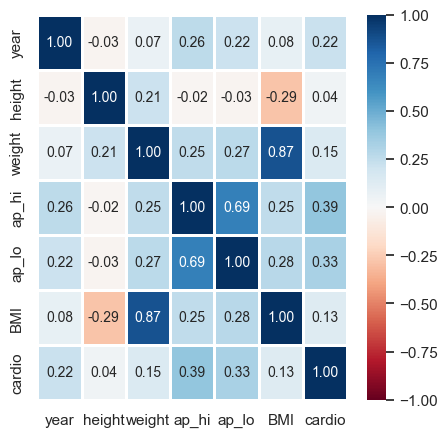

In [2]:
numericData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

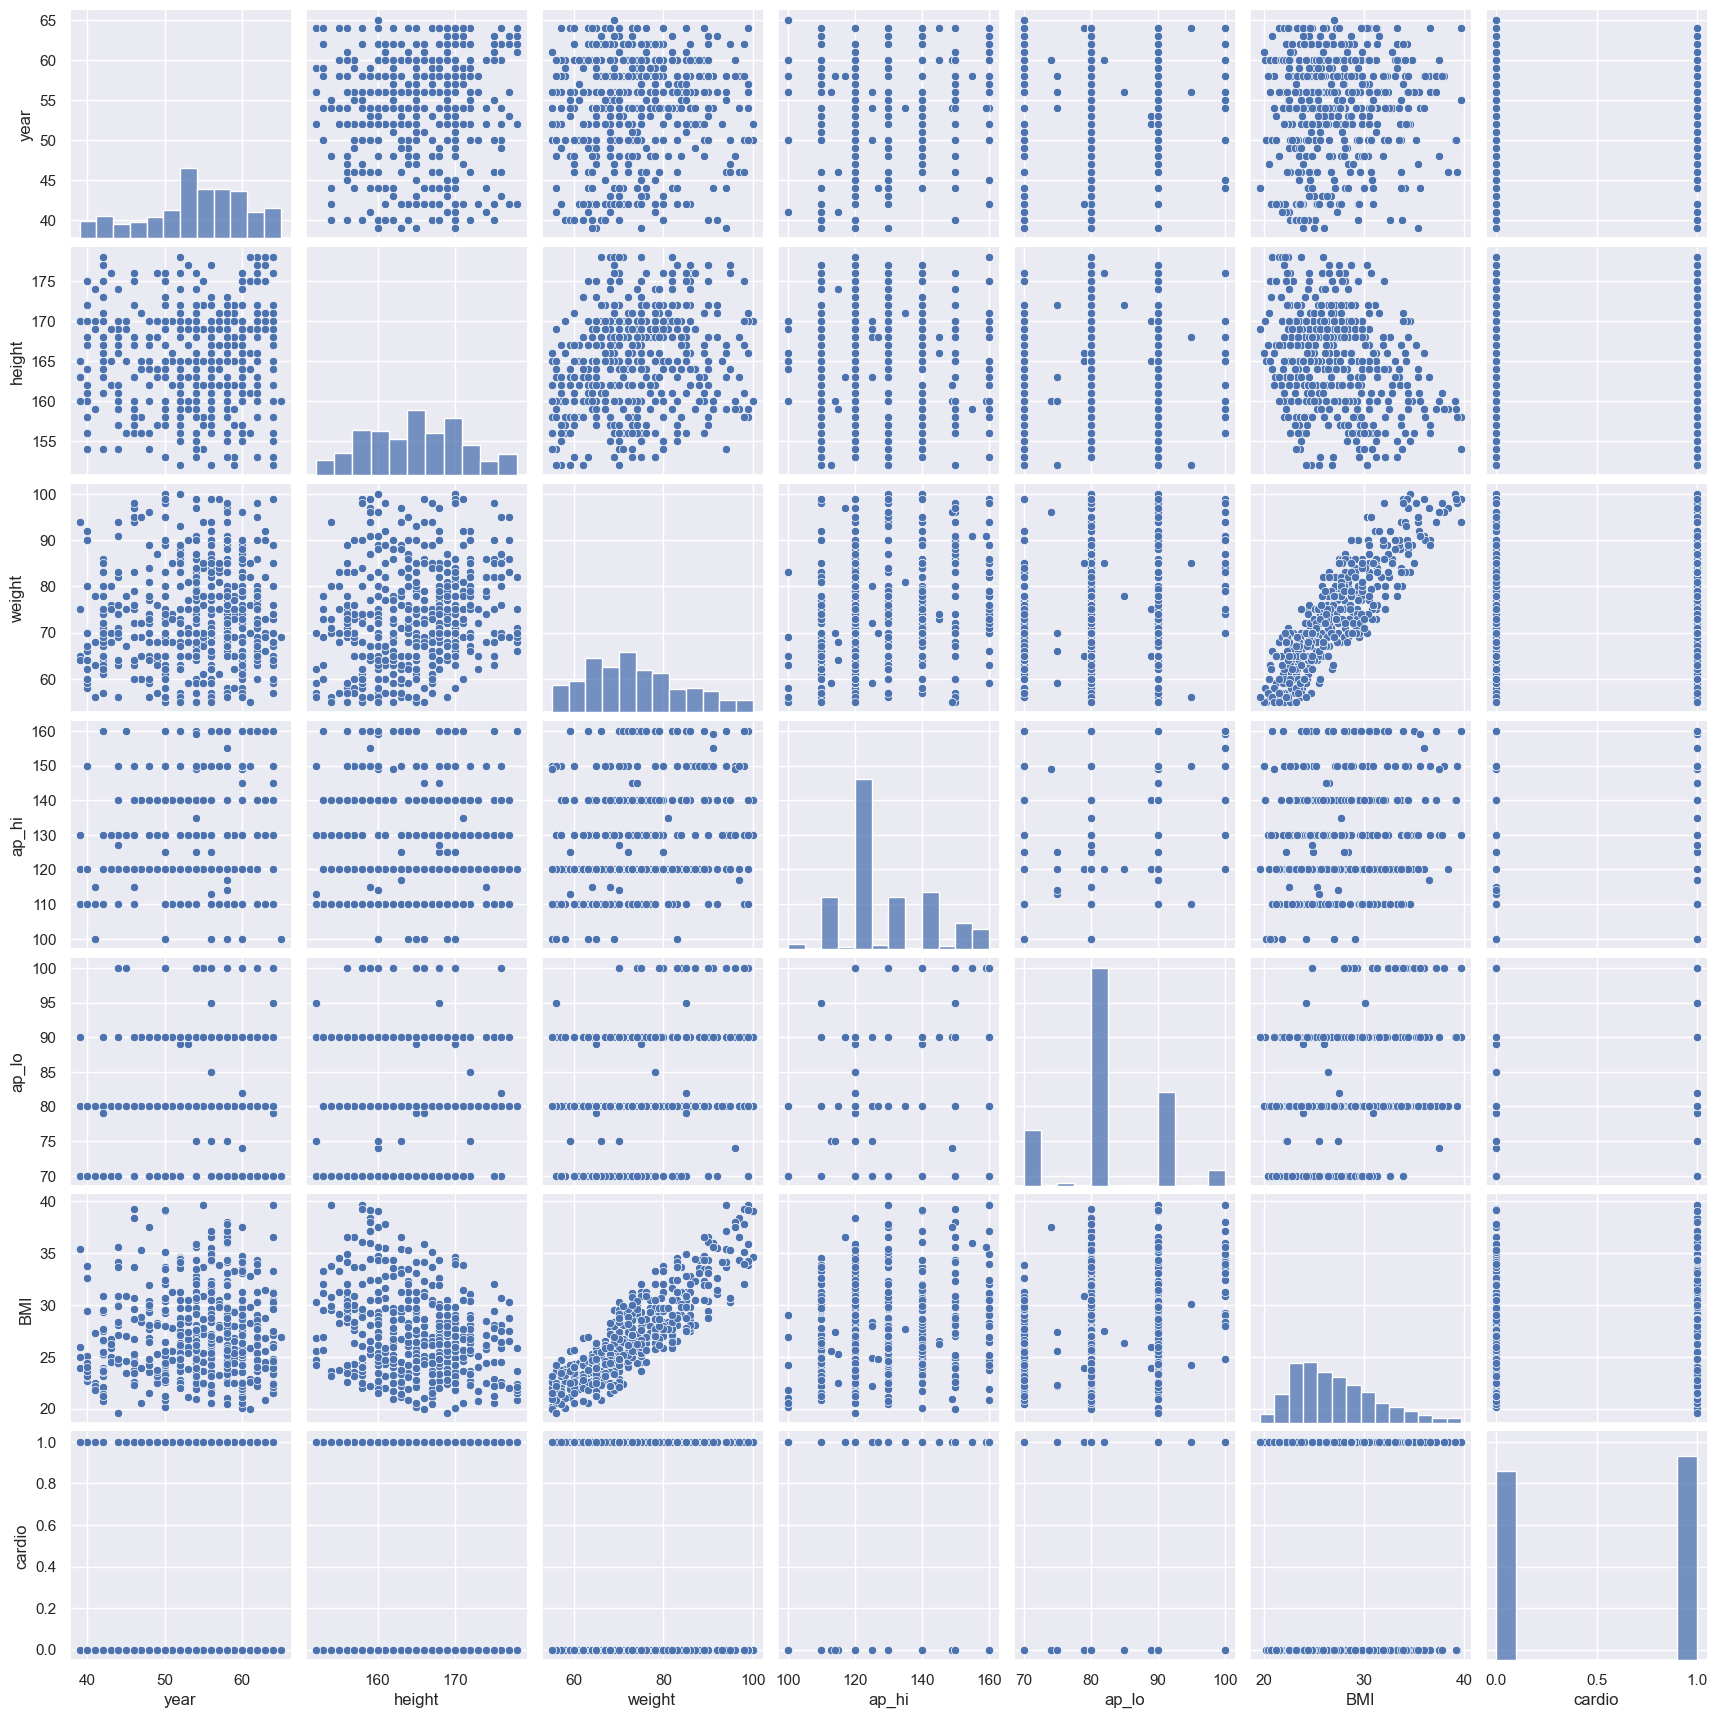

In [3]:
# Extract the Features from the Data
X = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])

# Plot the Raw Data on 2D grids
sb.pairplot(X)

In [4]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05, n_neighbors=50)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

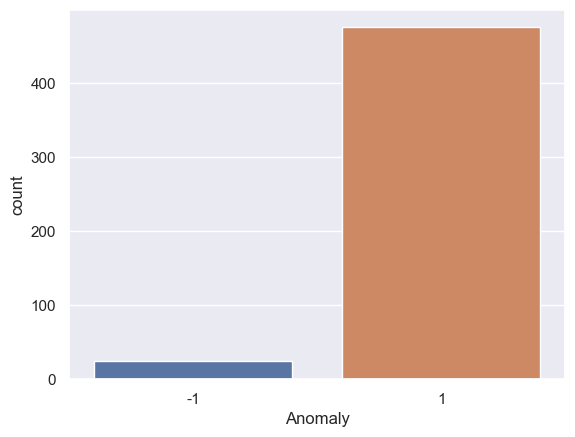

In [5]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

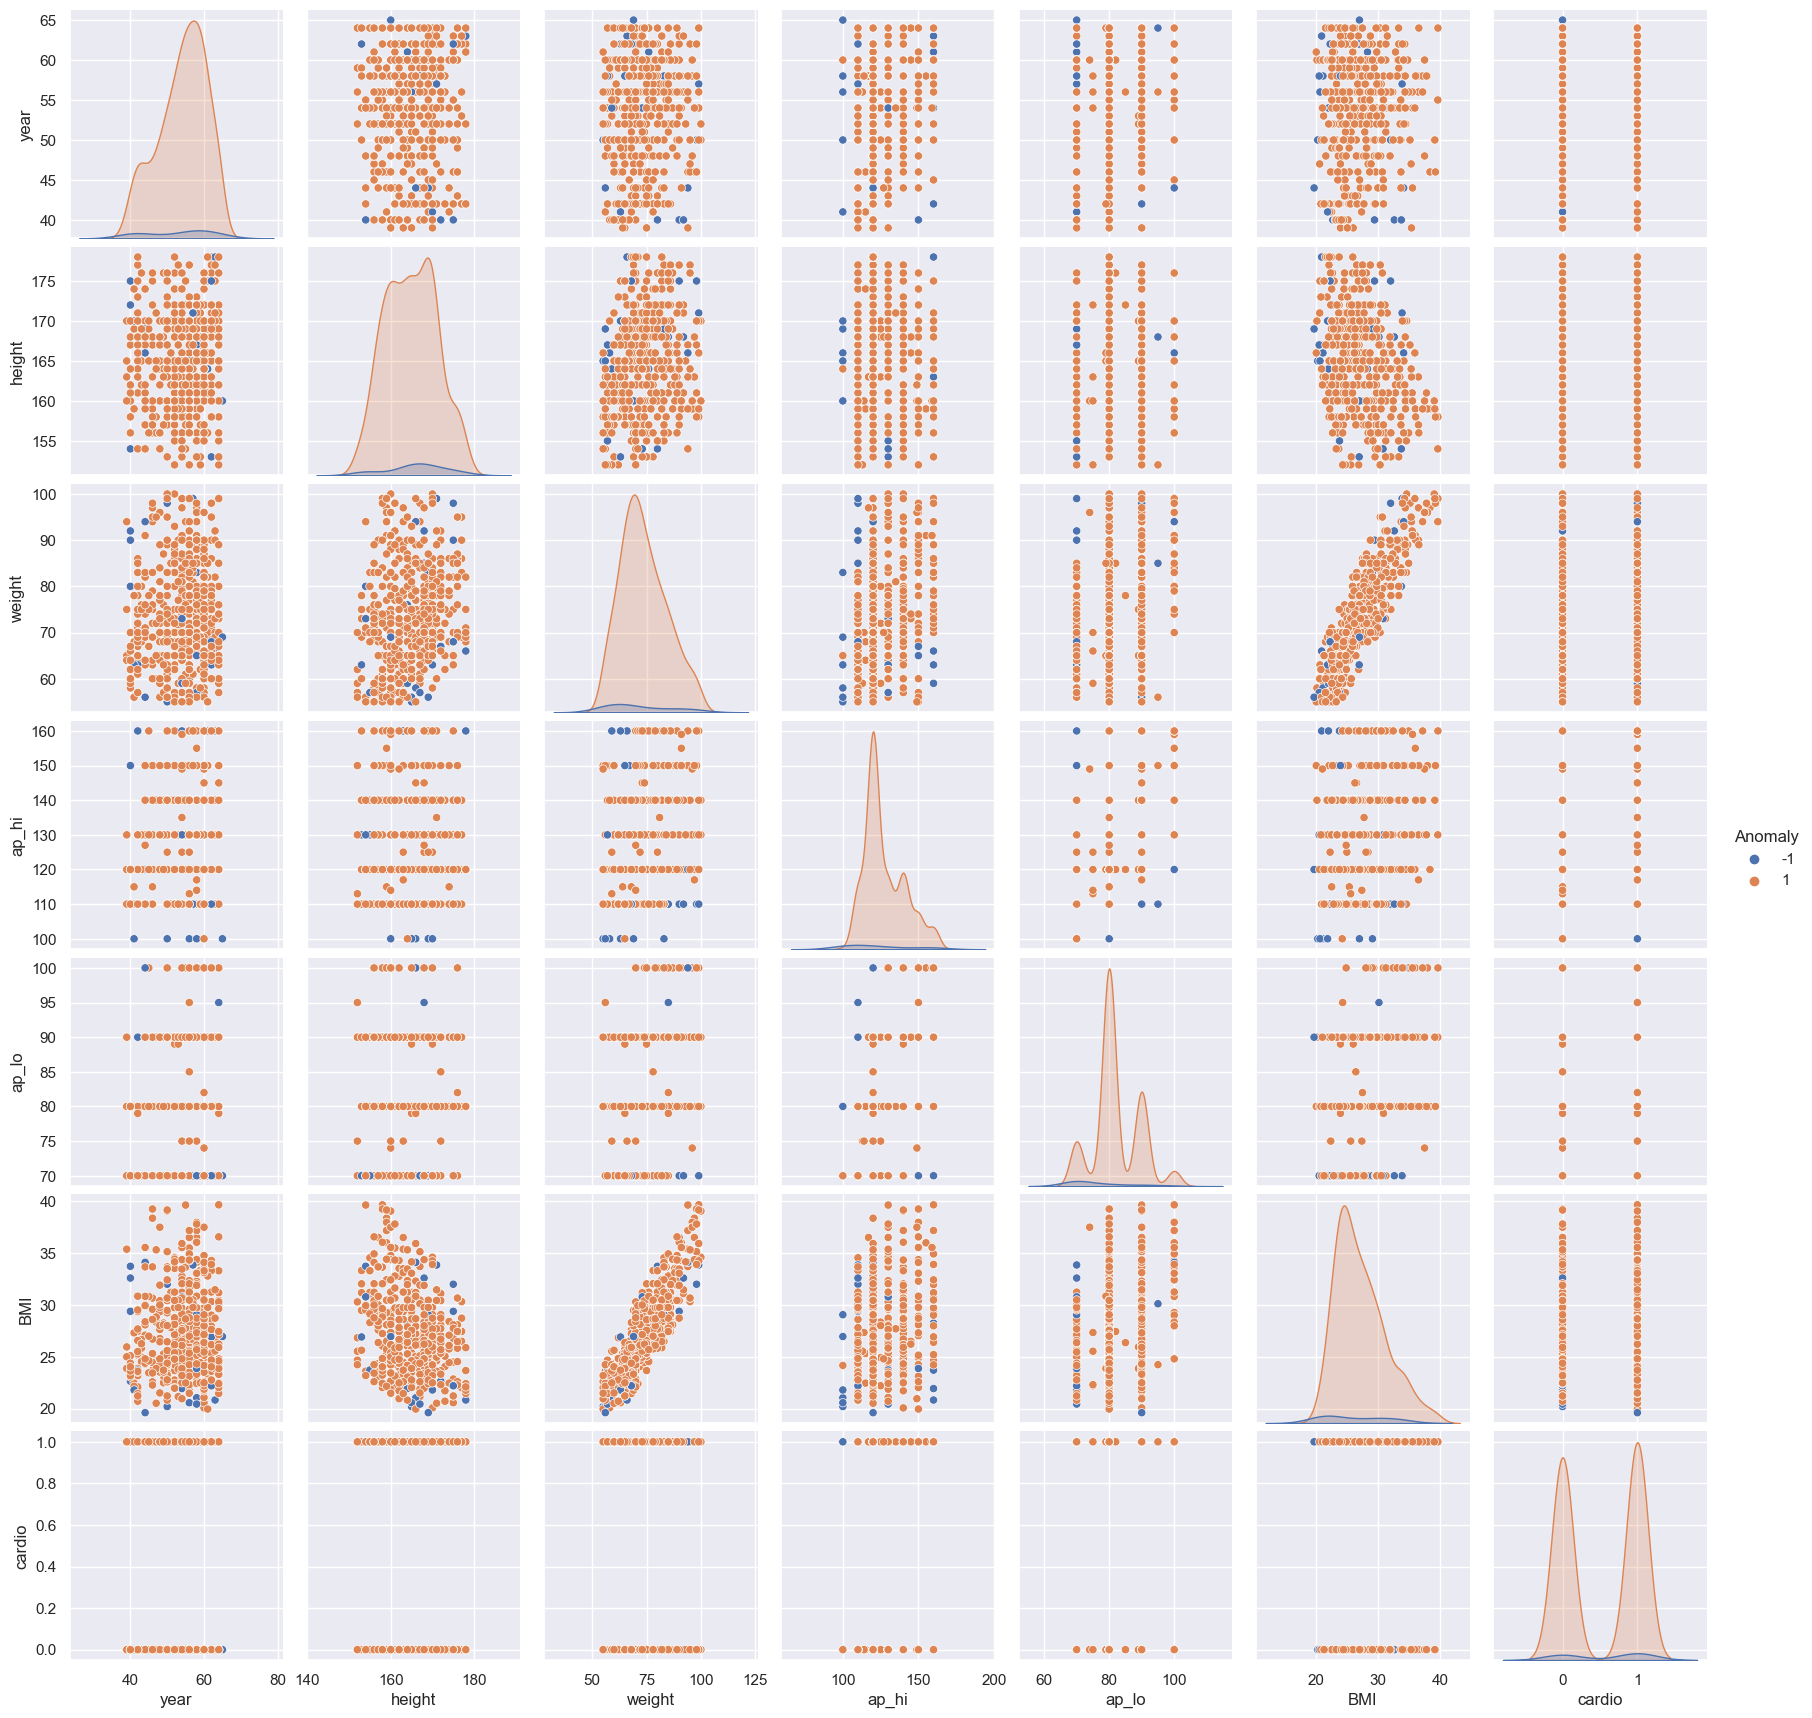

In [6]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

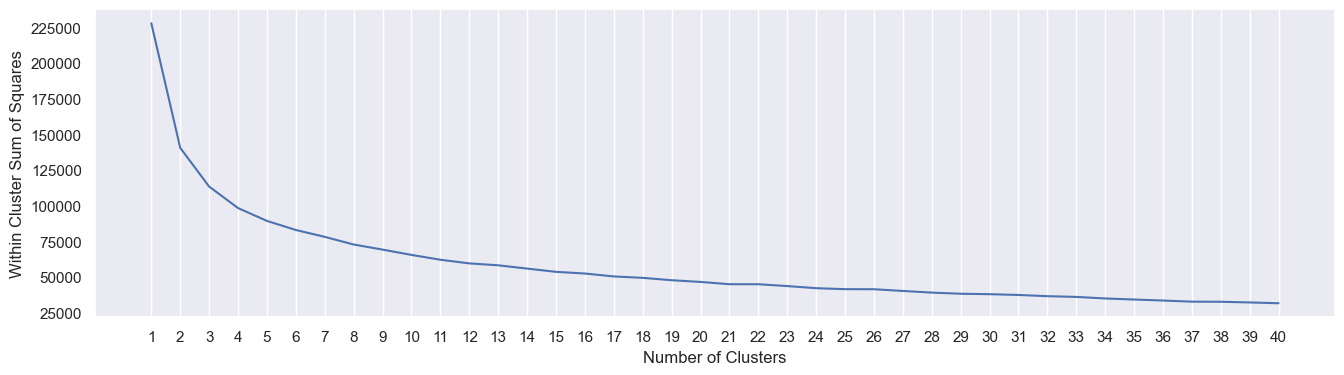

In [7]:
# Vary the Number of Clusters
from sklearn.cluster import KMeans

min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [8]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=6, n_init=20)

Features 	year 	height 	weight 	ap_hi 	ap_lo 	BMI 	cardio

Cluster 0:	52.76	165.74	86.83	121.37	80.93	31.72	0.46	
Cluster 1:	50.65	163.71	68.16	109.59	72.3	25.49	0.3	
Cluster 2:	53.44	160.34	63.7	121.88	80.27	24.84	0.32	
Cluster 3:	56.76	165.43	87.17	148.46	91.65	32.0	0.83	
Cluster 4:	54.15	169.78	71.68	122.06	80.35	24.91	0.47	
Cluster 5:	56.36	163.84	68.68	144.45	87.08	25.64	0.86	

Within Cluster Sum of Squares : 82652.51957394983



<AxesSubplot: xlabel='Cluster', ylabel='count'>

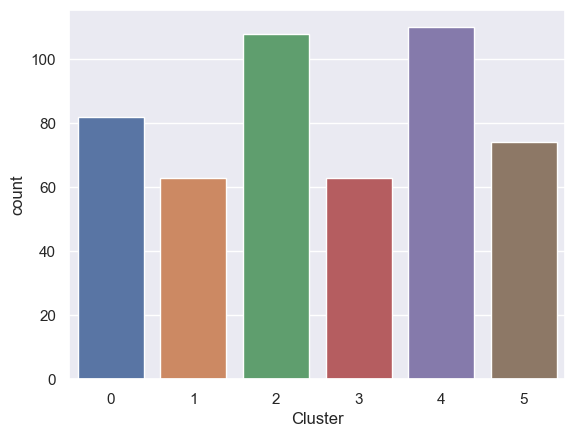

In [9]:
# Print the Cluster Centers
print("Features", "\tyear", "\theight", "\tweight", "\tap_hi", "\tap_lo", "\tBMI", "\tcardio")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

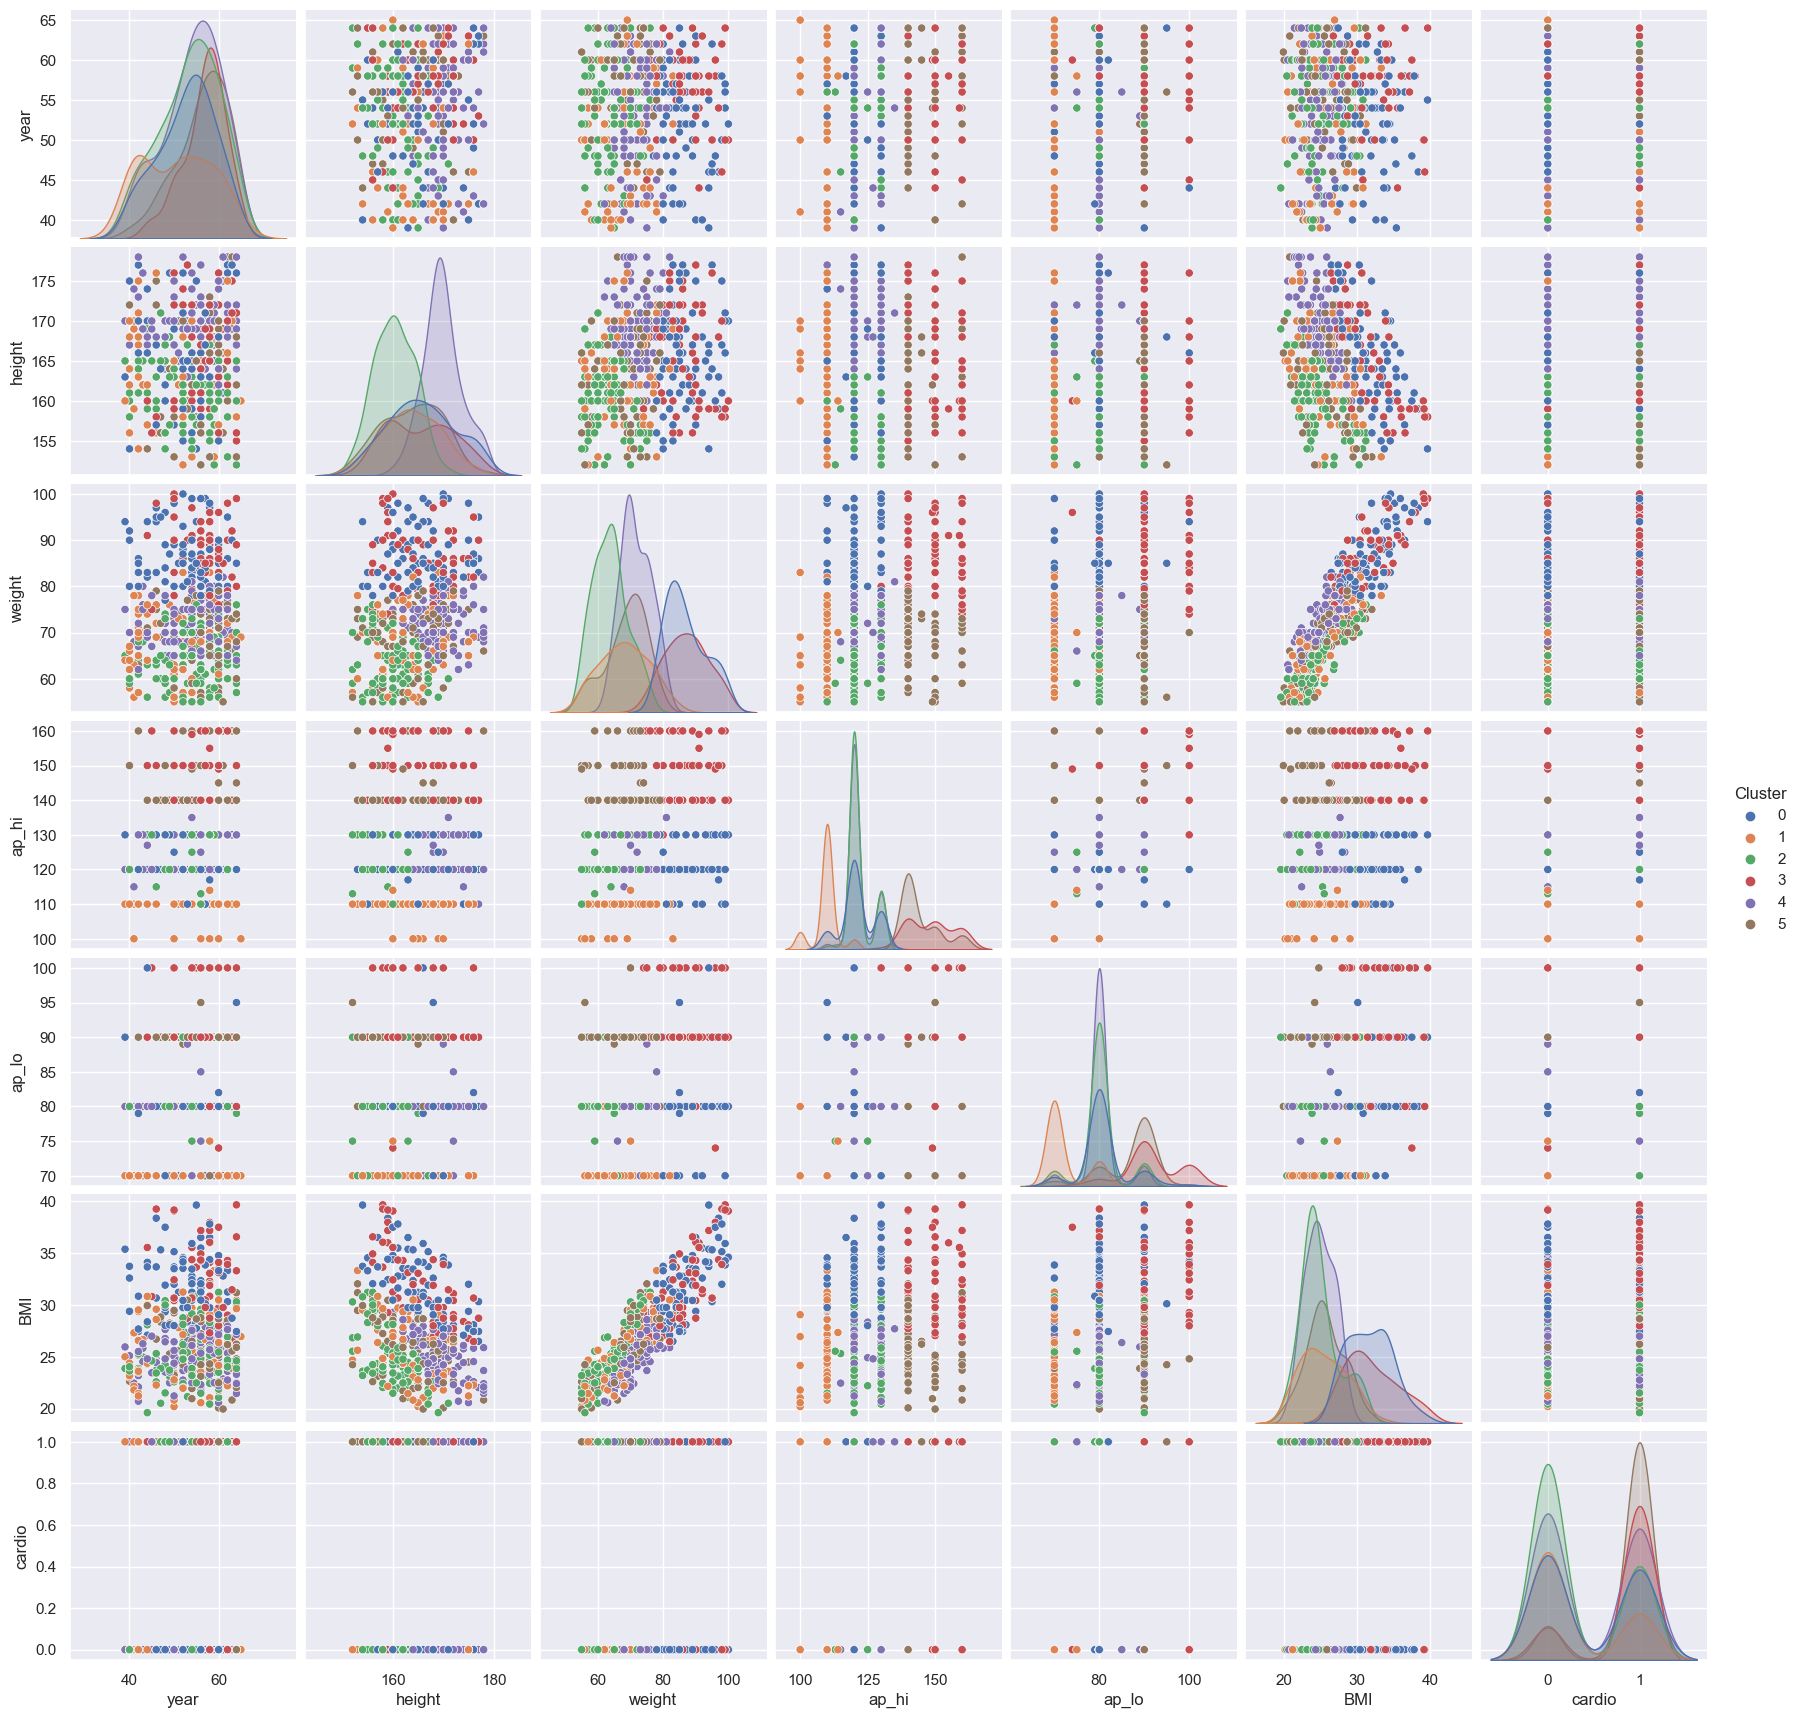

In [10]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<AxesSubplot: xlabel='BMI', ylabel='Cluster'>

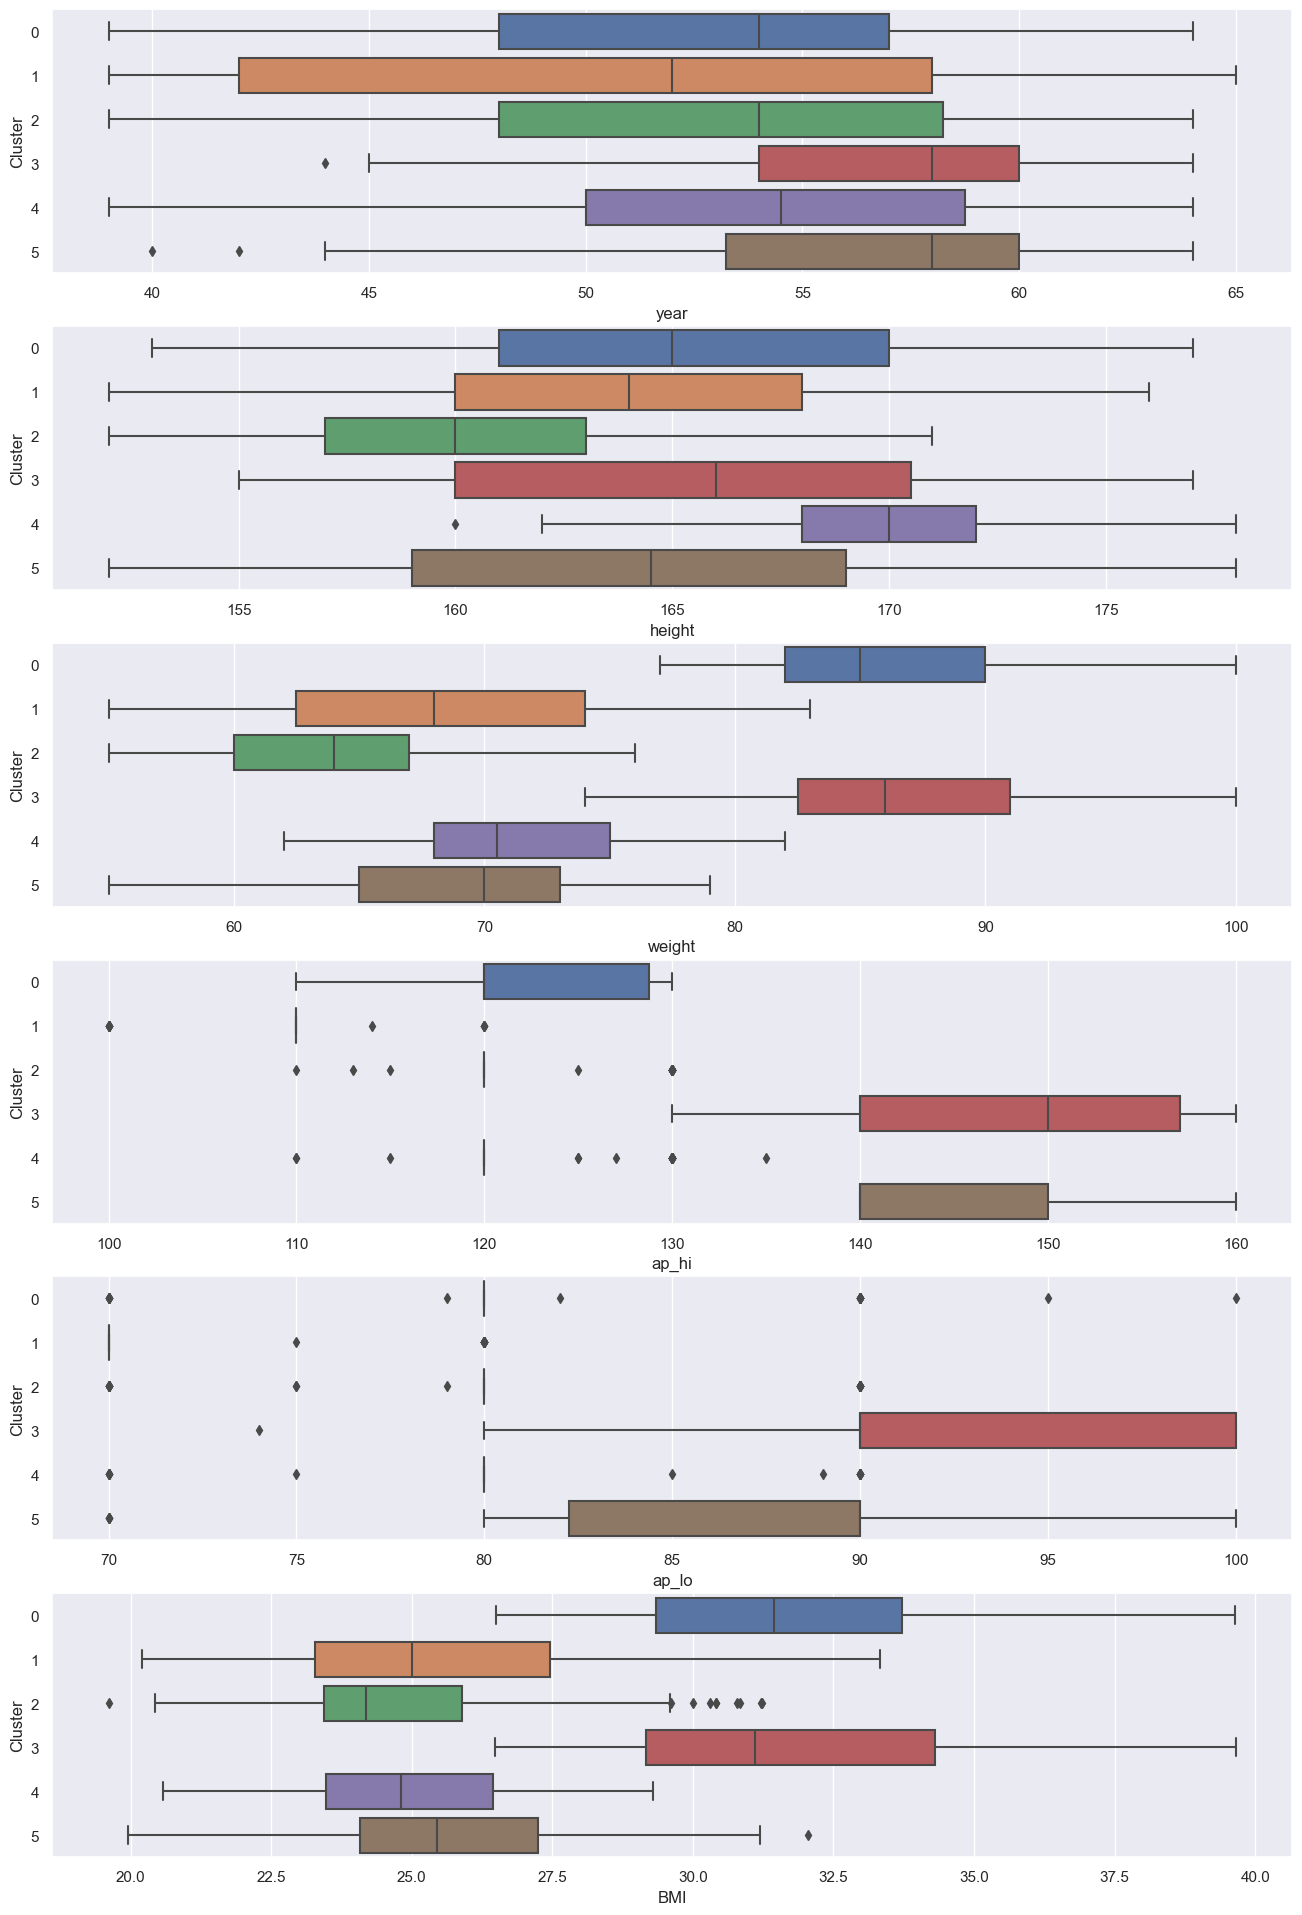

In [11]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'year', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'height', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'weight', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'ap_hi', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'ap_lo', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'BMI', y = 'Cluster', data = X_labeled, ax = axes[5])

<AxesSubplot: xlabel='Cluster'>

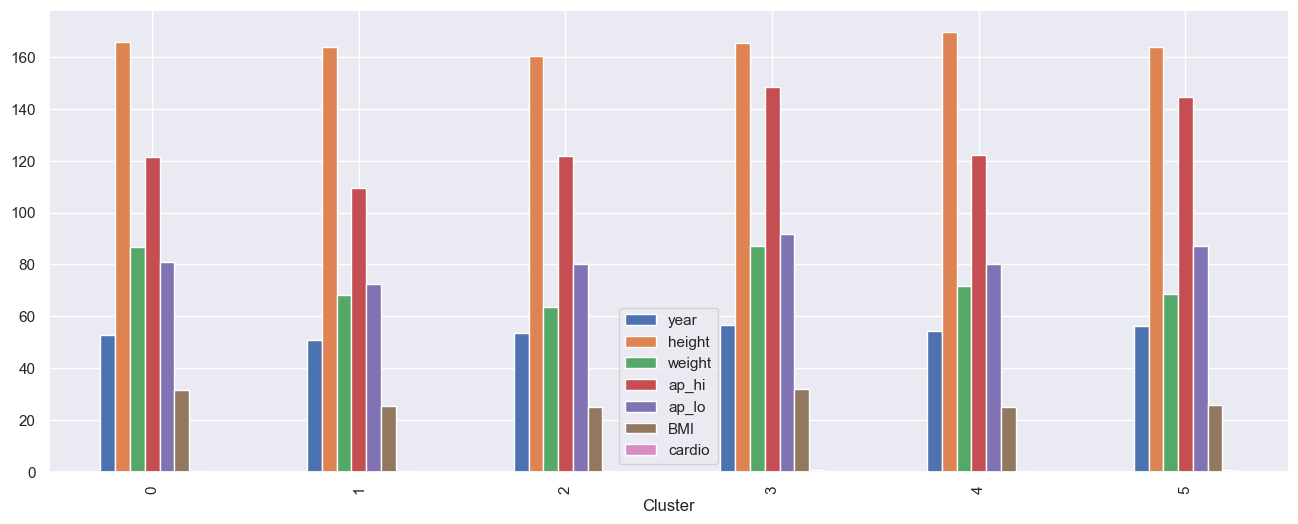

In [12]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))